In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




df = pd.read_csv('results/recres_200.csv')
pd.set_option('display.max_columns', None)
df = df.loc[:, ~df.columns.str.contains(".*Unnamed.*")]
df = df.melt()
df[["model", "metric"]] = df.variable.str.split("_", expand=True)
df[['metric', '@k']] = df.metric.str.split('@', expand=True)
df.metric = df.metric.replace(['p','r'],['precision', 'recall'])
df = df.drop(columns=['variable'])

rbm_df = pd.read_csv("results/rbm_results_200.csv")
rbm_df = rbm_df.loc[:, ~rbm_df.columns.str.contains(".*Unnamed.*")]
rbm_df = rbm_df.melt()
rbm_df['model'] = 'rbm'
rbm_df[['metric', '@k']] = rbm_df.variable.str.split('@', expand=True)
rbm_df = rbm_df.drop(columns=['variable'])

vae_df = pd.read_csv("results/vae_results_200.csv")
vae_df = vae_df.loc[:, ~vae_df.columns.str.contains(".*Unnamed.*")]
vae_df = vae_df.melt()
vae_df['model'] = 'vae'
vae_df[['metric', '@k']] = vae_df.variable.str.split('@', expand=True)
vae_df = vae_df.drop(columns=['variable'])


df = pd.concat([df, rbm_df, vae_df]).reset_index()
display(df)

# df = df.pivot(columns=['model', 'metric', '@k'], values='value')
# # Data is now wide
# df.columns = df.columns.to_flat_index().str.join(' ').str.replace('  ', '')
# models = ["random", "baseline", "svd", "knn", "normal"]
# grid = sns.FacetGrid()
# for m in models:
#     md = df.iloc[:, df.columns.get_level_values(0)==m]
#     md = md.iloc[:, md.columns.get_level_values('metric')=="p"]
#     sns.violinplot(md)
#     #display(md.describe().loc[["mean", 'std']])

,index,value,model,metric,@k
0,0,0.000008,random,fittime,None
1,1,0.000007,random,fittime,None
2,2,0.000008,random,fittime,None
3,3,0.000007,random,fittime,None
4,4,0.000007,random,fittime,None
...,...,...,...,...,...
120655,11920,0.220000,vae,precision,50
120656,11921,0.260000,vae,precision,50
120657,11922,0.300000,vae,precision,50
120658,11923,0.180000,vae,precision,50


/tmp/ipykernel_285736/3995686979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["@k"] = pd.to_numeric(data["@k"])


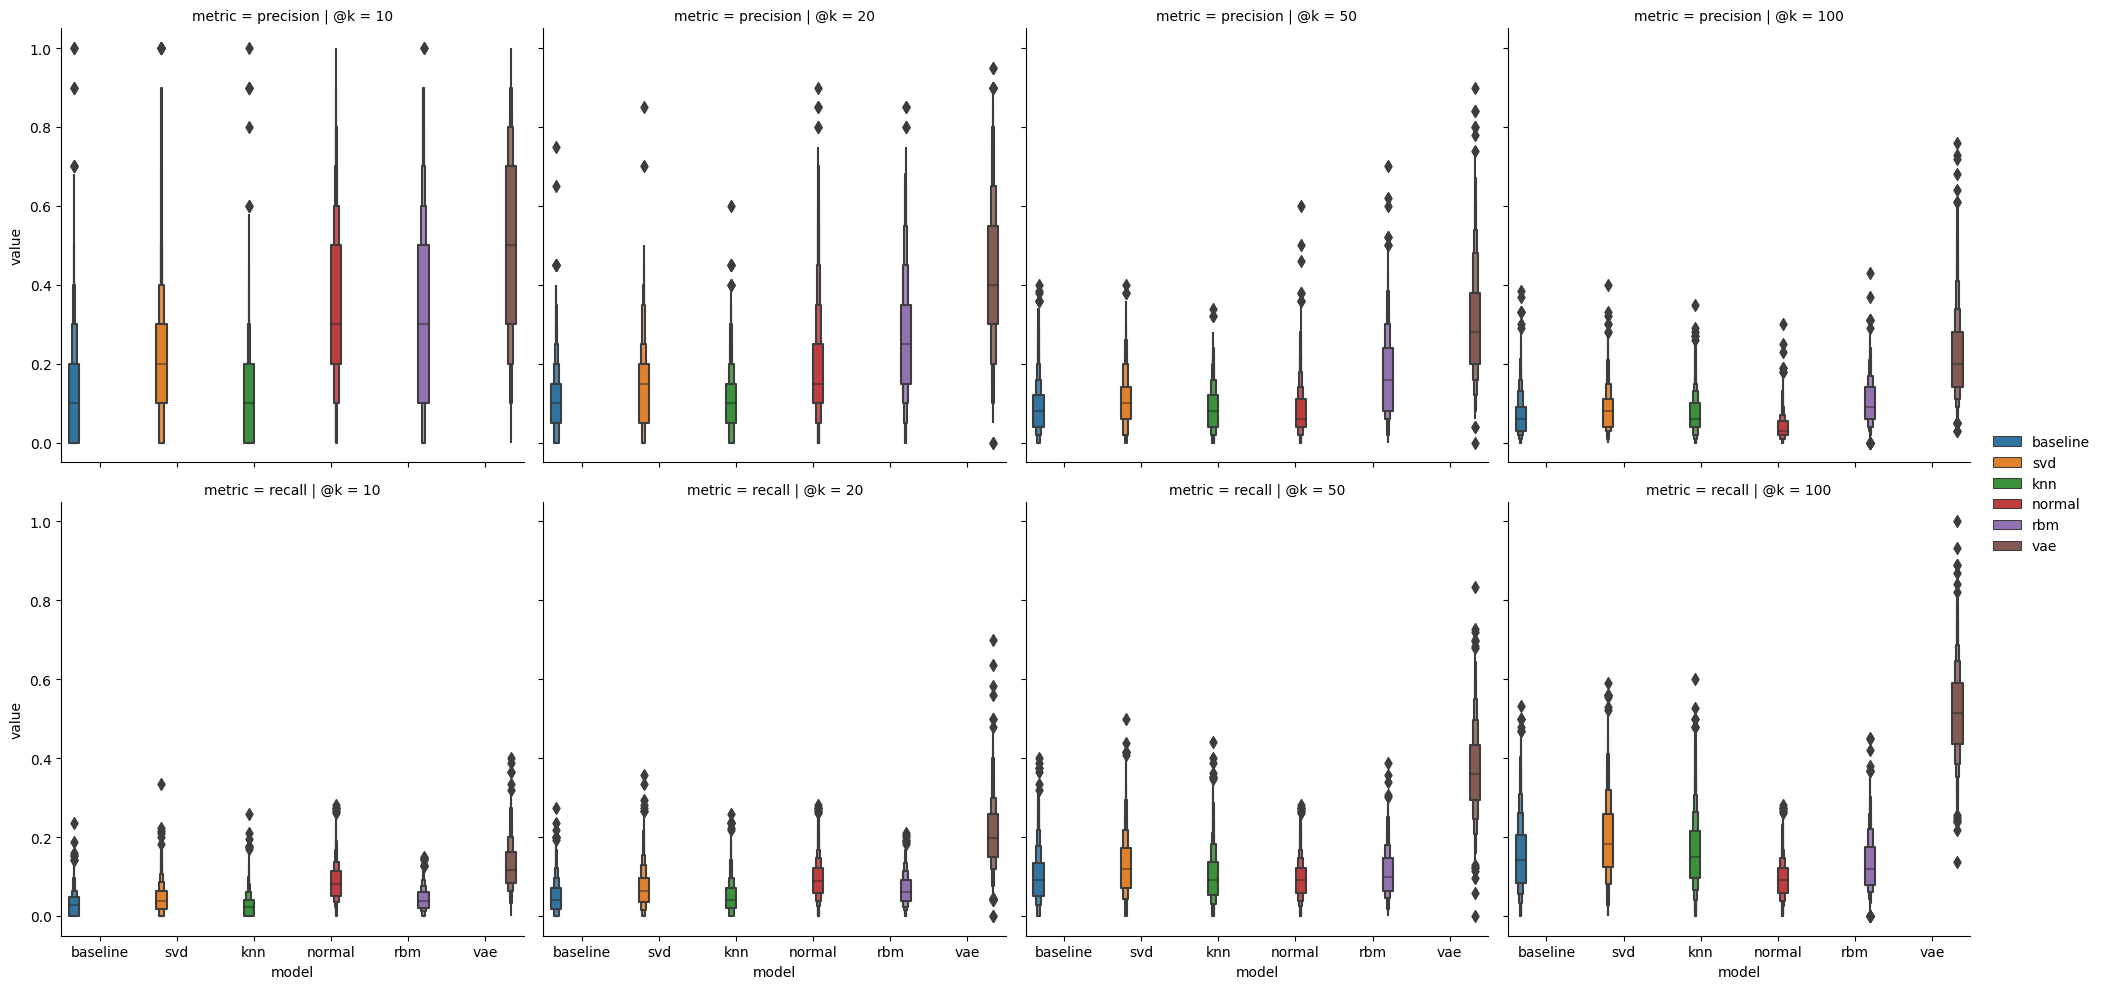

In [105]:
data = df[df.metric.isin(["precision","recall"]) & df.model.isin(["baseline", "svd", "knn", "normal", "rbm", "vae"])]
data["@k"] = pd.to_numeric(data["@k"])
#display(data)


sns.catplot(
    data=data, 
    kind="boxen", 
    col='@k',
    row='metric', 
    x='model', 
    y='value', 
    hue="model").add_legend()